# Administración de Riesgos Financieros

#### Por Carlos Santillán

## Proceso de Wiener ($W_{t}$)

## Bloque inicial

In [27]:
import numpy as np                  # Vectores
import pandas as pd                 # DataFrames
import matplotlib.pyplot as plt     # Gráficas
import math                         # Operaciones
from scipy import stats             # Paquetería estadística
from scipy.stats import kstest      # Prueba de Kolmogorov-Smirnov
from scipy.stats import beta        # Distribución Beta
from scipy.stats import expon       # Distribución Exponencial
from scipy.stats import norm        # Distribución Normal

%matplotlib inline   

### Construcción del Proceso de Wiener

- Consideraremos valores diarios, así que declaramos vectores de 365

In [35]:
### LLenamos vector con valores tomados de la Normal Inversa (0, 1)
mu = 0.005     ### mu de Black-Scholes
sigma = 0.02   ### sigma de Black-Scholes
n = 365        ### tamaño del vector
S0 = 40        ### Precio inicial

Nt = np.zeros(n)
Wt = np.zeros(n)

for i in range(0, len(Nt)-1):
    Nt[i] = np.random.uniform(0,1)

Wt = norm.ppf(Nt)
Wt = np.nan_to_num(Wt)


2. Construimos vector de valores acumulados (trayectoria) de $W_{t}$


In [15]:
trayWt = np.zeros(n)
trayWt[0] = Wt[0]
for i in range(0, len(trayWt)-1):
    trayWt[i+1] = trayWt[i] + Wt[i+1] 


### Construcción del Proceso Aritmético de Wiener $\mu + \sigma W_{t}$

3. Construimos el vector de $\mu + \sigma W_{t}$ 

In [19]:
muSigmaWt = np.zeros(n)
for i in range(0, len(muSigmaWt)-1):
    muSigmaWt[i] = mu + sigma*Wt[i]


4. Construimos trayectorias de $\mu + \sigma W_{t}$

In [21]:
trayMuSigmaWt = np.zeros(n)
trayMuSigmaWt[0] = muSigmaWt[0]
for i in range(0, len(trayMuSigmaWt)-1):
    trayMuSigmaWt[i+1] = trayMuSigmaWt[i] + muSigmaWt[i+1]

### Construcción del Proceso Geométrico de Wiener 

5. Calculamos el vector de $S_{0} e^{(\mu - \frac{\sigma^{2}}{2}) + \sigma Z}$

In [31]:
St = np.zeros(n)
St[0] = S0
for i in range(0, len(St)-1):
    St[i+1] = St[i] * math.exp((mu - ((sigma**2)/2)) + sigma * Wt[i])


### Gráficos

Observamos las **frecuencias** en los valores de $W_{t}$

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:159: RuntimeWarning: overflow encountered in multiply
  y *= step
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2481: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


Text(0.5, 0, 'Wt')

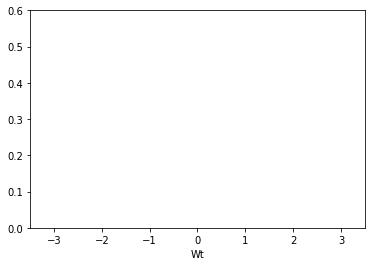

In [42]:
%matplotlib inline    

#min(Wt)      ### aprox -1.797693e+308 = inf
#max(Wt)     ### al rededor de 3.25

### Consideremos entonces intervalos "simétricos"
plt.hist(Wt, bins = 30)          ### Histograma
plt.axis([-3.5, 3.5, 0, 0.6])    ### Valores para eje x y para eje y
plt.xlabel("Wt")                 ### Título de eje x


Graficamos la **trayectoria** del *Proceso de Wiener*

Text(0.5, 1.0, 'Trayectoria Wt')

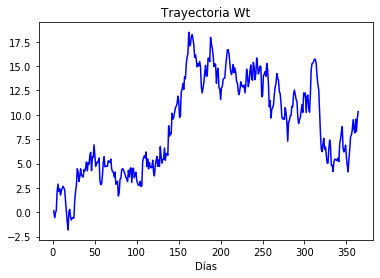

In [45]:
%matplotlib inline

Wt_Series = pd.Series(Wt)     ### Pasamos de numpy a pandas

### Otra alternativa es generar el vector de números ordinales
numOrd = np.zeros(n)
for i in range(0, len(numOrd)-1):
    numOrd[0] = 1
    numOrd[i+1] = numOrd[i] + 1

plt.plot(numOrd, trayWt, color = 'blue')
plt.xlabel('Días')
plt.title('Trayectoria Wt')


Graficamos el Proceso (sin trayectoria)


Text(0.5, 1.0, 'Wt')

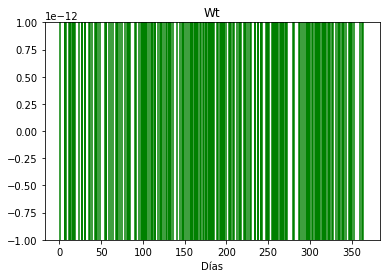

In [46]:
%matplotlib inline

plt.plot(numOrd, Wt, color = 'green')
plt.xlabel('Días')
plt.title('Wt')

Graficamos la **Trayectoria** del *Proceso Aritmético de Wiener*

Text(0.5, 1.0, 'Trayectoria del Aritmético')

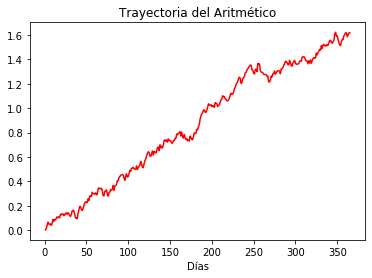

In [47]:
%matplotlib inline

plt.plot(numOrd, trayMuSigmaWt, color = 'red')
plt.xlabel('Días')
plt.title('Trayectoria del Aritmético')

Graficamos la trayectoria del **Geométrico**

Text(0.5, 1.0, 'Trayectoria del Geométrico (St)')

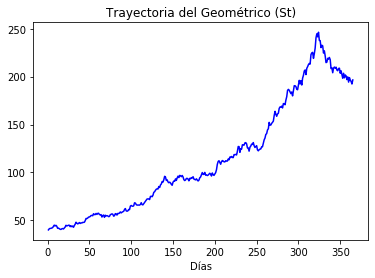

In [49]:
%matplotlib inline

plt.plot(numOrd, St, color = 'blue')
plt.xlabel('Días')
plt.title('Trayectoria del Geométrico (St)')